In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
import xlrd
from io import StringIO
import math
import os
import re
from scipy.spatial import Delaunay

from numba import njit
from numba import  prange
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objects as go

In [2]:
path="D:\Конференция_Магнитогорск_2022\Res__from_rar\\"
print(path)

D:\Конференция_Магнитогорск_2022\Res__from_rar\


In [3]:

os.listdir(path)[0]

'0420_03_4_025_500.txt'

In [4]:
x = open(path+os.listdir(path)[0],'r')
x.readline() 

'********************************************************************************\n'

In [5]:
def index_nodes_form_zero_frame(file):
    z= np.loadtxt(file,dtype='double',skiprows=44)[::,3]
    index = 0
    index_zero_node = np.zeros((1,1))
    for i in range(0,len(z)):
        if abs(z[i])<=10**(-5) and z[i]>=0 :
            index_zero_node[index]=i
            index_zero_node=np.concatenate((index_zero_node,np.zeros((1,1))))
            index = index+1
    return index_zero_node.flatten()

In [89]:
def preprocessing_res_np_ver_2 (file,z_index): 
    
    x_1 = (file[::,1])*10**3
    y_1 = (file[::,2])*10**3
    z_1 = (file[::,3])*10**3

    eps_11_name = file[::,10]
    eps_22_name = file[::,11]
    eps_33_name = file[::,12]
    eps_12_name = file[::,13]
    eps_13_name = file[::,14]
    eps_23_name = file[::,15]

    stress_11_name = (file[::,4])/10**6
    stress_22_name = (file[::,5])/10**6
    stress_33_name = (file[::,6])/10**6
    stress_12_name = (file[::,7])/10**6
    stress_13_name = (file[::,8])/10**6
    stress_23_name = (file[::,9])/10**6 

    index = 0
    
    
    x_1_ = np.zeros((1,1))
    y_1_ = np.zeros((1,1))
    z_1_ = np.zeros((1,1))
    
    s_11 =  np.zeros((1,1))
    s_22 =  np.zeros((1,1))
    s_33 =  np.zeros((1,1))
    s_12 =  np.zeros((1,1))
    s_13 =  np.zeros((1,1))
    s_23 =  np.zeros((1,1))
    s_int =  np.zeros((1,1))
    
    eps_11 =  np.zeros((1,1))
    eps_22 =  np.zeros((1,1))
    eps_33 =  np.zeros((1,1))
    eps_12 =  np.zeros((1,1))
    eps_13 =  np.zeros((1,1))
    eps_23 =  np.zeros((1,1))
    eps_int =  np.zeros((1,1))

    for j in range(0, np.shape(y_1)[0]) :
        if (j in z_index):
            if y_1[j]>= 0.25*(np.max(y_1)-np.min(y_1)) and y_1[j]<=0.75*(np.max(y_1)-np.min(y_1)): 
                x_1_[index]=x_1[j]
                y_1_[index]=y_1[j]
                z_1_[index]=z_1[j]
                #ind_[index] = j

                s_11[index] = stress_11_name[j]
                s_22[index] = stress_22_name[j]
                s_33[index] = stress_33_name[j]
                s_12[index] = stress_12_name[j]
                s_13[index] = stress_13_name[j]
                s_23[index] = stress_23_name[j]
                s_int[index] = (1/(np.sqrt(2)))*np.sqrt((stress_11_name[j]-stress_22_name[j])**2+(stress_22_name[j]-stress_33_name[j])**2+(stress_33_name[j]-stress_11_name[j])**2+6*(stress_12_name[j]**2+stress_13_name[j]**2+stress_23_name[j]**2))

                eps_11[index] = eps_11_name[j]
                eps_22[index] = eps_22_name[j]
                eps_33[index] = eps_33_name[j]
                eps_12[index] = eps_12_name[j]
                eps_13[index] = eps_13_name[j]
                eps_23[index] = eps_23_name[j]
                eps_int[index] = ((np.sqrt(2)/3))*np.sqrt((eps_11_name[j]-eps_22_name[j])**2+(eps_22_name[j]-eps_33_name[j])**2+(eps_33_name[j]-eps_11_name[j])**2+1.5*(eps_12_name[j]**2+eps_13_name[j]**2+eps_23_name[j]**2))


                x_1_=np.concatenate((x_1_,np.zeros((1,1))))
                y_1_=np.concatenate((y_1_,np.zeros((1,1))))
                z_1_=np.concatenate((z_1_,np.zeros((1,1))))
                s_11=np.concatenate((s_11,np.zeros((1,1))))
                s_22=np.concatenate((s_22,np.zeros((1,1))))
                s_33=np.concatenate((s_33,np.zeros((1,1))))
                s_12=np.concatenate((s_12,np.zeros((1,1))))
                s_13=np.concatenate((s_13,np.zeros((1,1))))
                s_23=np.concatenate((s_23,np.zeros((1,1))))
                s_int=np.concatenate((s_int,np.zeros((1,1))))

                eps_11=np.concatenate((eps_11,np.zeros((1,1))))
                eps_22=np.concatenate((eps_22,np.zeros((1,1))))
                eps_33=np.concatenate((eps_33,np.zeros((1,1))))
                eps_12=np.concatenate((eps_12,np.zeros((1,1))))
                eps_13=np.concatenate((eps_13,np.zeros((1,1))))
                eps_23=np.concatenate((eps_23,np.zeros((1,1))))
                eps_int=np.concatenate((eps_int,np.zeros((1,1))))

                #Stress= np.concatenate((Stress,np.zeros((1,7))))
                #Strain= np.concatenate((Strain,np.zeros((1,7))))

                index = index+1

    res_0 = np.hstack((x_1_,y_1_,z_1_,s_11,s_22,s_33,s_12,s_13,s_23,s_int,eps_11,eps_22,eps_33,eps_12,eps_13,eps_23,eps_int))
    #i = np.where(res_0[::,0]==0)
    #res = np.zeros((1,len(x_1_)-1))
    #res = np.delete(res_0[::,0],i)
    res_1 = np.array(sorted(res_0, key=lambda x: x[0]))
    return  res_1

In [93]:
arr2D = np.array([[11 ,12, 13, 11],
                  [21, 22, 23, 24],
                  [31, 32, 33, 34]])
# Delete column at index 2 &amp; 3
arr2D = np.delete(arr2D, [0,1], axis=0)
print('Modified 2D Numpy Array by removing columns at index 2 &amp; 3')
print(arr2D)

Modified 2D Numpy Array by removing columns at index 2 &amp; 3
[[31 32 33 34]]


In [90]:
z_index_0 = index_nodes_form_zero_frame(path+os.listdir(path)[0])
file_test_0 =np.loadtxt(path+os.listdir(path)[1],dtype='double',skiprows=44) 
res_0 = preprocessing_res_np_ver_2(file_test_0,z_index_0)

In [94]:
#Удаляется вся строка , где встречается ноль по X
i = np.where(res_0[::,0]==0)
res_1 = np.delete(res_0[::],i,axis=0)
print(res_1)

[[-2.02913000e-01  2.71512000e+00  8.81038000e-04 ...  1.49340000e-05
   2.40052000e-04  3.29303091e-02]
 [-2.02864000e-01  2.69442000e+00  8.82013000e-04 ...  1.88674000e-05
   2.08513000e-04  3.29629339e-02]
 [-2.02810000e-01  2.67373000e+00  8.81861000e-04 ...  5.15195000e-05
   1.88173000e-04  3.30373245e-02]
 ...
 [ 2.11860000e-01  1.32856000e+00 -4.47086000e-04 ...  4.76855000e-06
   8.78352000e-05  3.29379965e-02]
 [ 2.11860000e-01  1.30784000e+00 -4.54922000e-04 ...  2.36917000e-05
   7.10271000e-05  3.30489702e-02]
 [ 2.11863000e-01  1.34929000e+00 -4.45605000e-04 ... -4.18031000e-05
   1.01378000e-04  3.28080680e-02]]


In [9]:
index_nodes_form_zero_frame(path+os.listdir(path)[6])

array([0.0000e+00, 1.0000e+00, 2.0000e+00, ..., 8.6995e+04, 8.6996e+04,
       0.0000e+00])

In [10]:
def average_val_np(array_1):
    """ Построение осредненных распределений """
    b=np.zeros((22))
    for i in range(0,22):
        b[i]=np.median(np.array_split(array_1,22)[i])

    return b

In [11]:
%%time
x_0 = average_val_np(res_0[::,0])
s_22_ = average_val_np(res_0[::,4]) 

Wall time: 118 ms


Wall time: 248 ms


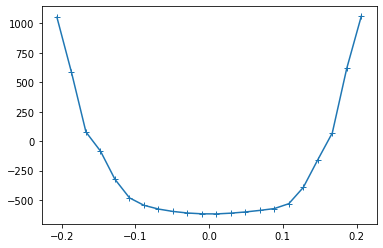

In [12]:
%%time
plt.plot((x_0-(x_0.max()+x_0.min())/2),s_22_,'-+',label = r'$\beta$ = 0')

In [13]:
def find_files_l_and_angle_a(path,l,angle_a):
    index = []
    for j in range(0,len(os.listdir(path))):
        if ( re.search("0420_"+l+"_"+str(angle_a),path+os.listdir(path)[j] )):
            index.append(j)
    
    return index  

In [14]:
def find_files_l_and_angle_b(path,l,angle_b):
    index = []
    for j in range(0,len(os.listdir(path))):
        if ( re.search("0420_"+l+"_",path+os.listdir(path)[j] ) and re.search(angle_b,path+os.listdir(path)[j] )):
            index.append(j)
    
    return index  

In [15]:
path="D:\Конференция_Магнитогорск_2022\Res__from_rar\\"
#print(path)
find_files_l_and_angle_a(path,'03',4)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [16]:
find_files_l_and_angle_b(path,'05','050')

[91,
 92,
 93,
 95,
 97,
 99,
 101,
 103,
 105,
 107,
 109,
 110,
 111,
 113,
 115,
 117,
 119,
 121,
 123,
 125,
 127,
 128,
 129,
 131,
 133,
 135,
 137,
 139,
 141,
 143,
 145,
 146,
 147,
 149,
 151,
 153,
 155,
 157,
 159,
 161,
 163,
 164,
 165,
 167,
 169,
 171,
 173,
 175,
 177,
 179]

In [18]:
%%time
def data_for_res_plot_angle_a(path,l, angle_a):
    index_ = find_files_l_and_angle_a(path,l,angle_a)#path,'03',4
    res = []
    z_index = []
    file_test = []
    for i,j in enumerate(index_):
        if i <=len(index_)-1:
            if i%2 ==0:
                z_index_0 = index_nodes_form_zero_frame(path+os.listdir(path)[j])
                z_index.append(z_index_0)
            else:
                file_test_0 =np.loadtxt(path+os.listdir(path)[j],dtype='double',skiprows=44) 
                file_test.append(file_test_0)
                name =  os.listdir(path)[j]

    for i in range(0,len(z_index)):
            res_0 = preprocessing_res_np_ver_2(file_test[i],z_index[i])
            res.append(res_0)
            
    return res, name
res,  name = data_for_res_plot_angle_a(path,'03',4)
print(res, name)

[array([[-2.02913000e-01,  2.71512000e+00,  8.81038000e-04, ...,
         1.49340000e-05,  2.40052000e-04,  3.29303091e-02],
       [-2.02864000e-01,  2.69442000e+00,  8.82013000e-04, ...,
         1.88674000e-05,  2.08513000e-04,  3.29629339e-02],
       [-2.02810000e-01,  2.67373000e+00,  8.81861000e-04, ...,
         5.15195000e-05,  1.88173000e-04,  3.30373245e-02],
       ...,
       [ 2.11860000e-01,  1.32856000e+00, -4.47086000e-04, ...,
         4.76855000e-06,  8.78352000e-05,  3.29379965e-02],
       [ 2.11860000e-01,  1.30784000e+00, -4.54922000e-04, ...,
         2.36917000e-05,  7.10271000e-05,  3.30489702e-02],
       [ 2.11863000e-01,  1.34929000e+00, -4.45605000e-04, ...,
        -4.18031000e-05,  1.01378000e-04,  3.28080680e-02]]), array([[-2.05891000e-01,  2.71531000e+00,  3.63929000e-04, ...,
         6.88676000e-05, -5.16804000e-05,  3.27792445e-02],
       [-2.05885000e-01,  2.69461000e+00,  3.65562000e-04, ...,
         8.33713000e-05, -6.82894000e-05,  3.28063637

In [86]:
res,name = data_for_res_plot_angle_a(path,'03',4)

IndexError: invalid index to scalar variable.

<IPython.core.display.Javascript object>


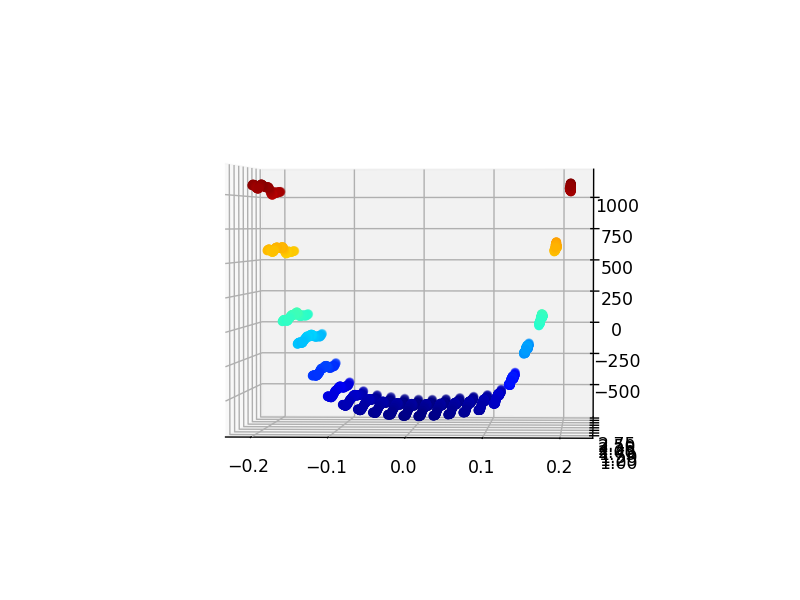

In [96]:
fig = plt.figure()
ax = plt.axes(projection='3d')
xdata =  (res_1[::,0])
ydata =  (res_1[::,1])
zdata =  (res_1[::,4])
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='jet');
ax.view_init(45, 35)
#Для контурного графика нажна функция f(l,r)
#ax.contour3D(xdata, ydata, zdata, 50, cmap='Greens');

In [30]:
def triarea(a, b, c):
    ab = b - a
    ac = c - a
    return 0.5 * (ab[:,0]*ac[:,1]-ab[:,1]*ac[:,0])

In [42]:
Node = np.zeros((len(res[1][::,0]),2))
for i in range(0,len(res[1][::,0])):
                for j in range(0,2):
                    if res[1][::,0][i]!=0 or res[1][::,0][i]!=0: 
                        if j == 0 :
                            Node[i,j] = res[1][::,0][i]
                        else:
                            Node[i,j] = res[1][::,1][i]

print(Node)

[[-0.205891  2.71531 ]
 [-0.205885  2.69461 ]
 [-0.205877  2.67391 ]
 ...
 [ 0.207274  0.955836]
 [ 0.207277  0.93514 ]
 [ 0.207278  0.914461]]


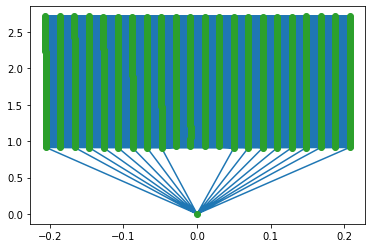

In [43]:
tri =Delaunay(Node)
plt.triplot(Node[:,0], Node[:,1], tri.simplices)
plt.plot(Node[:,0], Node[:,1], 'o')
plt.show()

In [44]:
def f(x, y):
    return res[1][::,4]

<IPython.core.display.Javascript object>


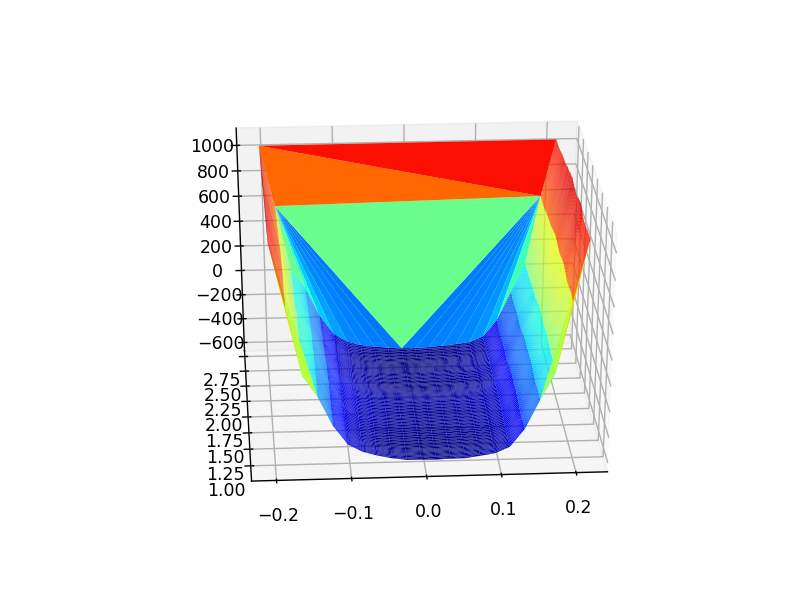

In [97]:
fig = plt.figure()
ax = plt.axes(projection='3d')
xdata =  res_1[::,0]
ydata =  res_1[::,1]
zdata =  res_1[::,4]
#ax.plot_surface(xdata, ydata, zdata, rstride=1, cstride=1,
#                cmap='viridis', edgecolor='none');
#ax.view_init(45, 35)
#Для контурного графика нажна функция f(l,r)
#ax.contour3D(xdata, ydata, zdata, 50, cmap='Greens');
ax.plot_trisurf(xdata, ydata, zdata,cmap='jet', linewidth=0.2)

In [ ]:
import pandas as pd
from scipy.interpolate import griddata
# create 1D-arrays from the 2D-arrays
x = X.reshape(1600)
y = Y.reshape(1600)
z = Z.reshape(1600)
xyz = {'x': x, 'y': y, 'z': z}

# put the data into a pandas DataFrame (this is what my data looks like)
df = pd.DataFrame(xyz, index=range(len(xyz['x']))) 

# re-create the 2D-arrays
x1 = np.linspace(df['x'].min(), df['x'].max(), len(df['x'].unique()))
y1 = np.linspace(df['y'].min(), df['y'].max(), len(df['y'].unique()))
x2, y2 = np.meshgrid(x1, y1)
z2 = griddata((df['x'], df['y']), df['z'], (x2, y2), method='cubic')

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.coolwarm,
    linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Meshgrid Created from 3 1D Arrays')
# ~~~~ MODIFICATION TO EXAMPLE ENDS HERE ~~~~ #

plt.show()

In [101]:
np.where(res_1[::,4]=='Nan')

<ipython-input-101-cfb38d83ff6e>:1: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



(array([], dtype=int64),)

<IPython.core.display.Javascript object>


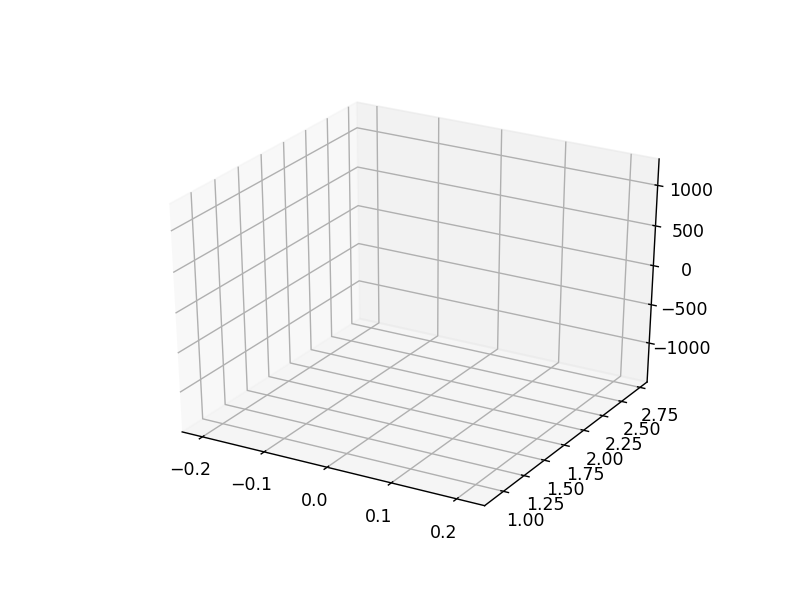

<ipython-input-100-923dc874cc56>:9: UserWarning:

Z contains NaN values. This may result in rendering artifacts.



In [100]:
from scipy.interpolate import griddata
x1 = np.linspace(res_1[::,0].min(), res_1[::,0].max(), len(res_1[::,0]))
y1 = np.linspace(res_1[::,1].min(), res_1[::,1].max(), len(res_1[::,1]))
x2, y2 = np.meshgrid(x1, y1)
z2 = griddata((res_1[::,0], res_1[::,1]), res_1[::,4], (x2, y2), method='cubic')

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap='coolwarm',linewidth=0, antialiased=False)
plt.show()

In [57]:
print(zdata)

[1061.88, 1062.15, 1061.55, 1061.94, 1066.18, 1070.73, 1073.2, 1073.19, 1072.0, 1071.95, 1071.77, 1068.62, 1065.44, 1063.47, 1059.85, 1056.51, 1054.57, 1053.62, 1052.66, 1054.71, 1056.25, 1055.45, 1057.95, 1061.44, 1061.97, 1060.11, 1060.57, 1060.43, 1061.41, 1064.59, 1065.31, 1066.29, 1065.67, 1063.96, 1061.7, 1056.97, 1053.89, 1052.63, 1049.13, 1045.04, 1043.72, 1043.63, 1043.09, 1045.11, 1048.98, 1052.66, 1055.75, 1058.81, 1062.66, 1066.2, 1070.65, 1073.46, 1075.0, 1074.82, 1073.49, 1071.44, 1068.03, 1063.11, 1059.29, 1058.57, 1057.62, 1057.71, 1058.58, 1060.58, 1064.92, 1068.59, 1072.42, 1078.62, 1082.29, 1085.09, 1087.58, 1089.47, 1088.03, 1089.52, 1087.8, 1086.58, 1084.55, 1081.53, 1077.76, 1074.5, 1072.45, 1071.53, 1072.05, 1082.86, 1071.77, 1077.02, 1072.7, 1081.36, 593.49, 593.803, 596.538, 599.069, 600.447, 601.097, 601.179, 601.531, 602.057, 602.029, 601.026, 600.087, 598.543, 595.812, 593.405, 591.802, 589.823, 588.26, 587.25, 586.587, 587.29, 587.935, 588.044, 588.969, 591

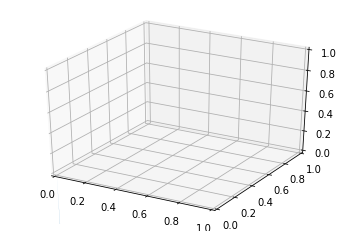

In [59]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

x = xdata

y = ydata

z =zdata

vertices = [list(zip(x,y,z))]

poly = Poly3DCollection(vertices, alpha=0.8)

ax.add_collection3d(poly)

#ax.set_xlim(0,5)

#ax.set_ylim(0,5)

#ax.set_zlim(0,5)    

In [17]:
%%time
def plot_res(res,name):
    plt.figure(figsize=(30, 14))
    angle_a = name[8]
    l = name[6]
    

    plt.subplots(figsize=(12, 14))
   
    for i in range(0,len(res)):
        x_0 = average_val_np(res[i][::,0])
        s_int_0 = average_val_np(res[i][::,9])
        eps_int_0 = average_val_np(res[i][::,-1])
        plt.subplot(2,1,1)
        #plt.title("Угол наклона {} , длина калибровочного участка{0.}".format(angle_a,l))
        if (i==0):
            plt.plot((x_0-(x_0.max()+x_0.min())/2),s_int_0,'-d',linewidth=3.0,color = "black",label = r'$\beta$ = '+str(i*0.25))
        else:
            plt.plot((x_0-(x_0.max()+x_0.min())/2),s_int_0,'-+',label = r'$\beta$ = '+str(i*0.25))
        
        plt.ylabel('$\sigma_{i}$, МПа ', fontsize=22)
        plt.tick_params(axis='x',length=10,labelsize = 17,zorder=15)
        plt.tick_params(axis='y',length=5,labelsize = 17,zorder=15)
        
        plt.subplot(2,1,2)
        if (i==0):
            plt.plot((x_0-(x_0.max()+x_0.min())/2),eps_int_0,'-d',linewidth=3.0,color = "black",label = r'$\beta$ = '+str(i*0.25))
        else :
            plt.plot((x_0-(x_0.max()+x_0.min())/2),eps_int_0,'-+',label = r'$\beta$ = '+str(i*0.25))
                
        plt.ylabel('$\epsilon_{i}$, - ', fontsize=22)
        
        plt.tick_params(axis='x',length=10,labelsize = 17,zorder=15)
        plt.tick_params(axis='y',length=5,labelsize = 17,zorder=15)
    
    plt.xlabel(' r, мм', fontsize=22) #, fontname='Times New Roman')
    plt.legend(loc='upper right',bbox_to_anchor=(1.3, 1.35), shadow=False, ncol=1,fontsize=17)
    #plt.title("Угол наклона {} , длина калибровочного участка{0.}".format(angle_a,l))

    plt.savefig('res_'+str(l)+'_'+str(angle_a)+'_'+'.jpeg',dpi=600,bbox_inches='tight' )
    plt.show()

Wall time: 0 ns


In [26]:
%%time
def plot_res_22(res,name):
    plt.figure(figsize=(30, 14))
    angle_a = name[8]
    l = name[6]
    

    plt.subplots(figsize=(12, 14))
   
    for i in range(0,len(res)):
        x_0 = average_val_np(res[i][::,0])
        s_22_0 = average_val_np(res[i][::,4])
        eps_22_0 = average_val_np(res[i][::,10])
        plt.subplot(2,1,1)
        #plt.title("Угол наклона {} , длина калибровочного участка{0.}".format(angle_a,l))
        if (i==0):
            plt.plot((x_0-(x_0.max()+x_0.min())/2),s_22_0,'-d',linewidth=3.0,color = "black",label = r'$\beta$ = '+str(i*0.25))
        else:
            plt.plot((x_0-(x_0.max()+x_0.min())/2),s_22_0,'-+',label = r'$\beta$ = '+str(i*0.25))
        
        plt.ylabel('$\sigma_{i}$, МПа ', fontsize=22)
        plt.tick_params(axis='x',length=10,labelsize = 17,zorder=15)
        plt.tick_params(axis='y',length=5,labelsize = 17,zorder=15)
        
        plt.subplot(2,1,2)
        if (i==0):
            plt.plot((x_0-(x_0.max()+x_0.min())/2),eps_22_0,'-d',linewidth=3.0,color = "black",label = r'$\beta$ = '+str(i*0.25))
        else :
            plt.plot((x_0-(x_0.max()+x_0.min())/2),eps_22_0,'-+',label = r'$\beta$ = '+str(i*0.25))
                
        plt.ylabel('$\epsilon_{i}$, - ', fontsize=22)
        
        plt.tick_params(axis='x',length=10,labelsize = 17,zorder=15)
        plt.tick_params(axis='y',length=5,labelsize = 17,zorder=15)
    
    plt.xlabel(' r, мм', fontsize=22) #, fontname='Times New Roman')
    plt.legend(loc='upper right',bbox_to_anchor=(1.3, 1.35), shadow=False, ncol=1,fontsize=17)
    #plt.title("Угол наклона {} , длина калибровочного участка{0.}".format(angle_a,l))

    plt.savefig('res_'+str(l)+'_'+str(angle_a)+'_'+'.jpeg',dpi=600,bbox_inches='tight' )
    plt.show()

Wall time: 0 ns


<timed exec>:13: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

<timed exec>:24: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

<timed exec>:13: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passin

<Figure size 2160x1008 with 0 Axes>

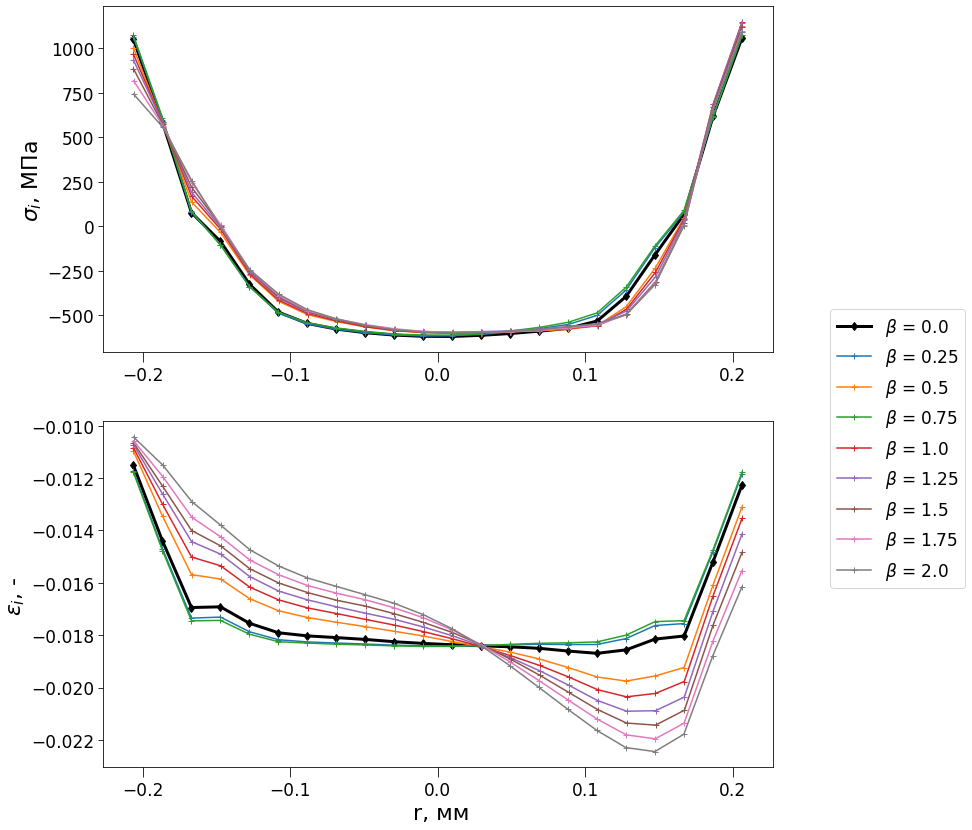

Wall time: 48.7 s


In [27]:
%%time
res,name = data_for_res_plot_angle_a(path,'03',4)
plot_res_22(res,name)

<timed exec>:13: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

<timed exec>:24: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

<timed exec>:13: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passin

<Figure size 2160x1008 with 0 Axes>

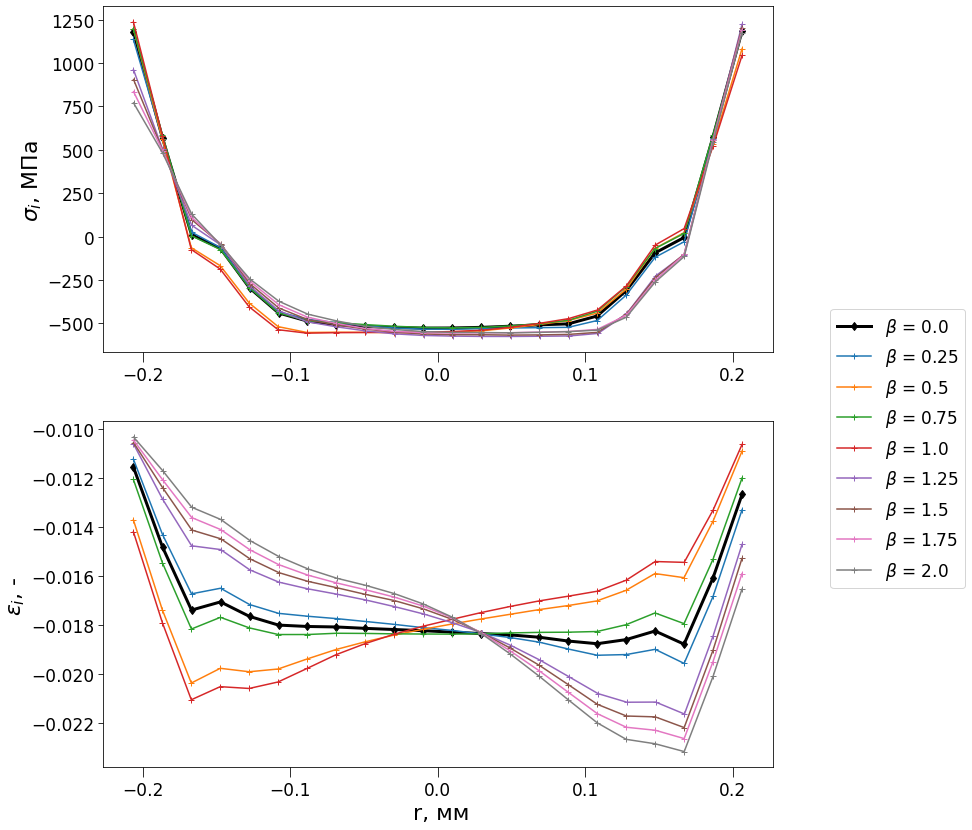

Wall time: 47.2 s


In [31]:
%%time
res,name = data_for_res_plot_angle_a(path,'03',5)
plot_res_22(res,name)

<timed exec>:13: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

<timed exec>:24: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

<timed exec>:13: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passin

<Figure size 2160x1008 with 0 Axes>

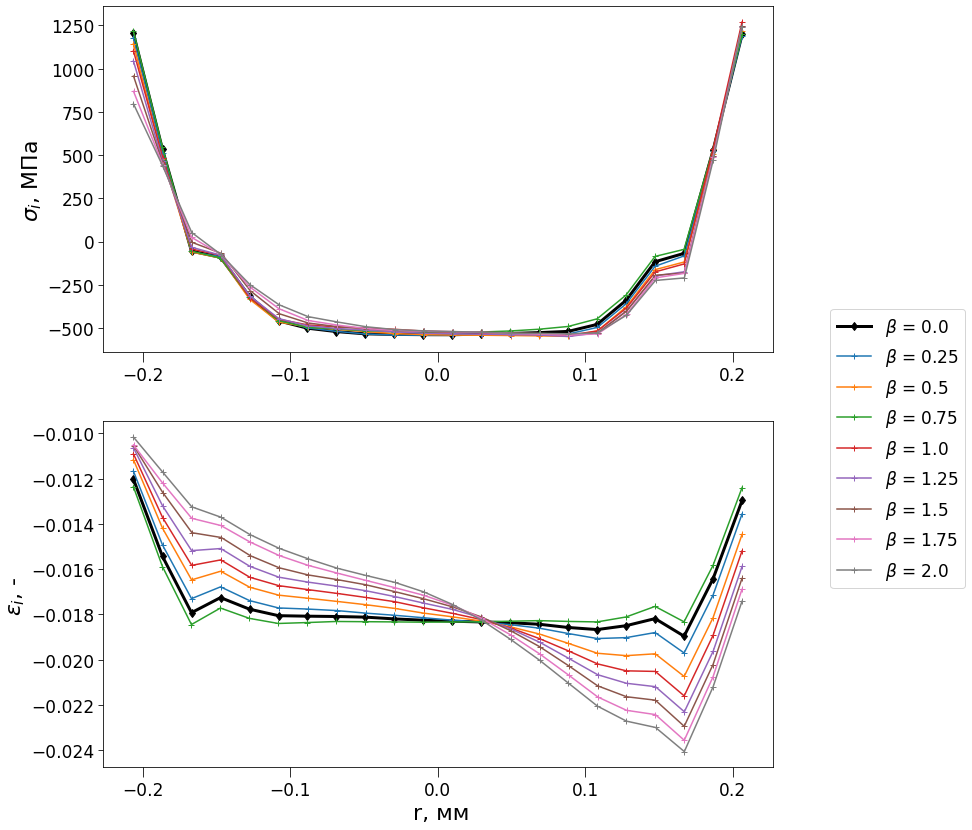

Wall time: 1min 25s


In [28]:
%%time
res,name = data_for_res_plot_angle_a(path,'03',6)
plot_res_22(res,name)

<timed exec>:13: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

<timed exec>:24: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

<timed exec>:13: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passin

<Figure size 2160x1008 with 0 Axes>

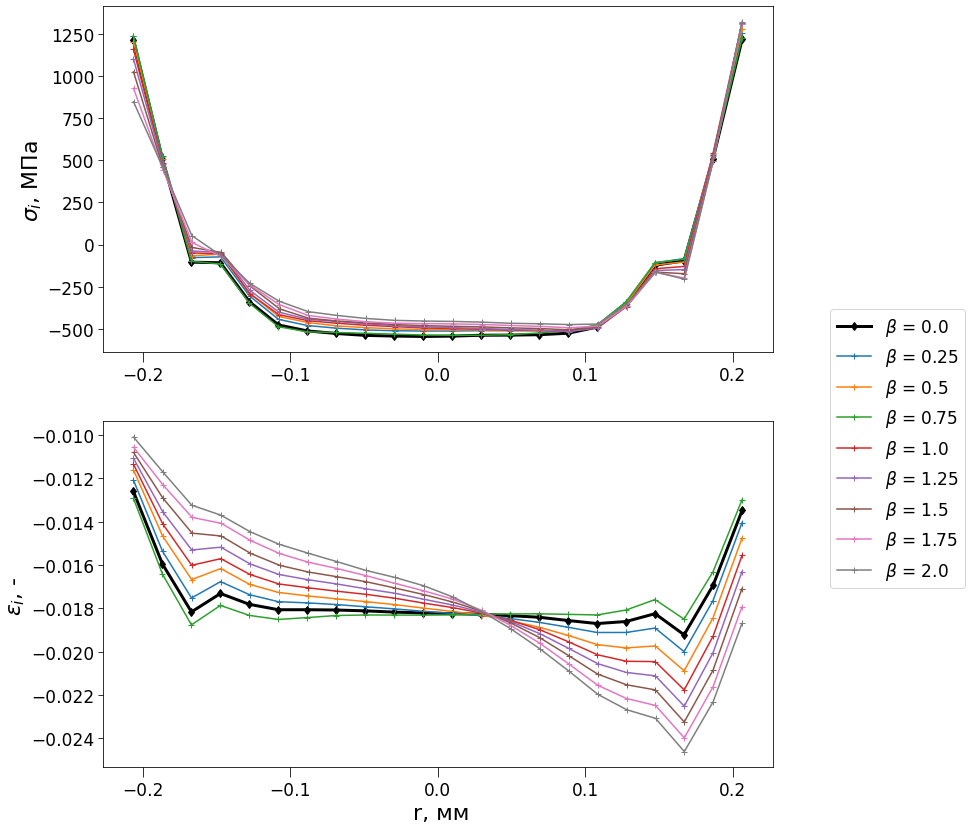

Wall time: 1min 17s


In [29]:
%%time
res,name = data_for_res_plot_angle_a(path,'03',7)
plot_res_22(res,name)

<timed exec>:13: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

<timed exec>:24: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

<timed exec>:13: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passin

<Figure size 2160x1008 with 0 Axes>

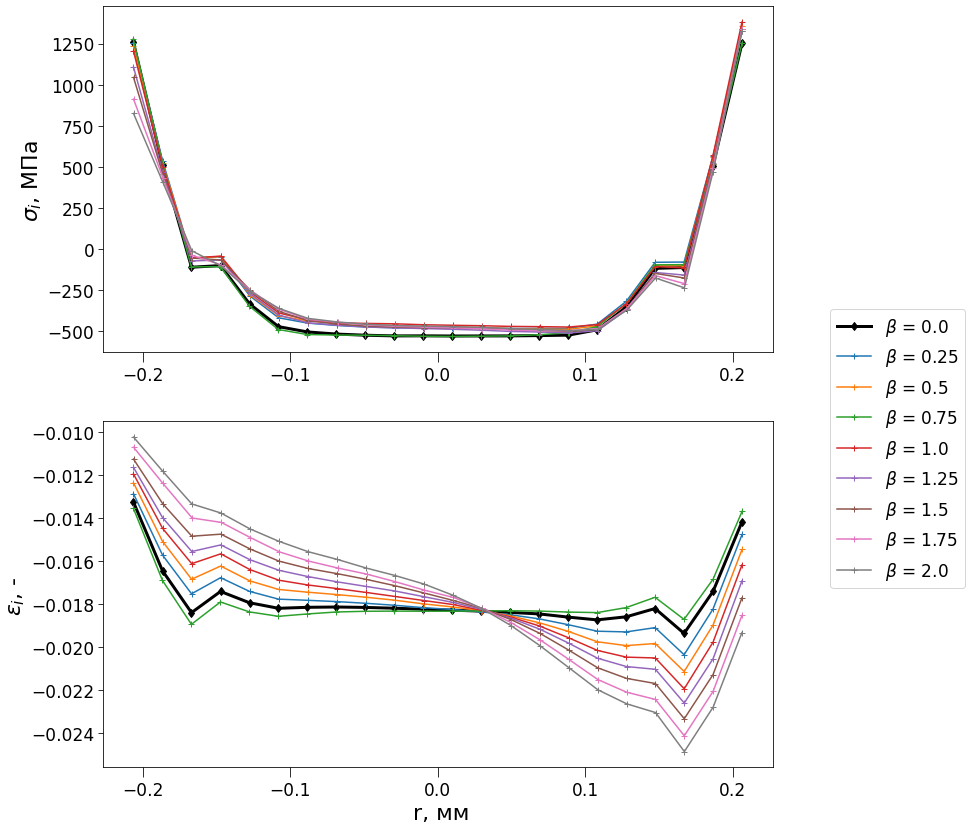

Wall time: 49.5 s


In [30]:
%%time
res,name = data_for_res_plot_angle_a(path,'03',8)
plot_res_22(res,name)

<timed exec>:13: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

<timed exec>:24: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

<timed exec>:13: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passin

<Figure size 2160x1008 with 0 Axes>

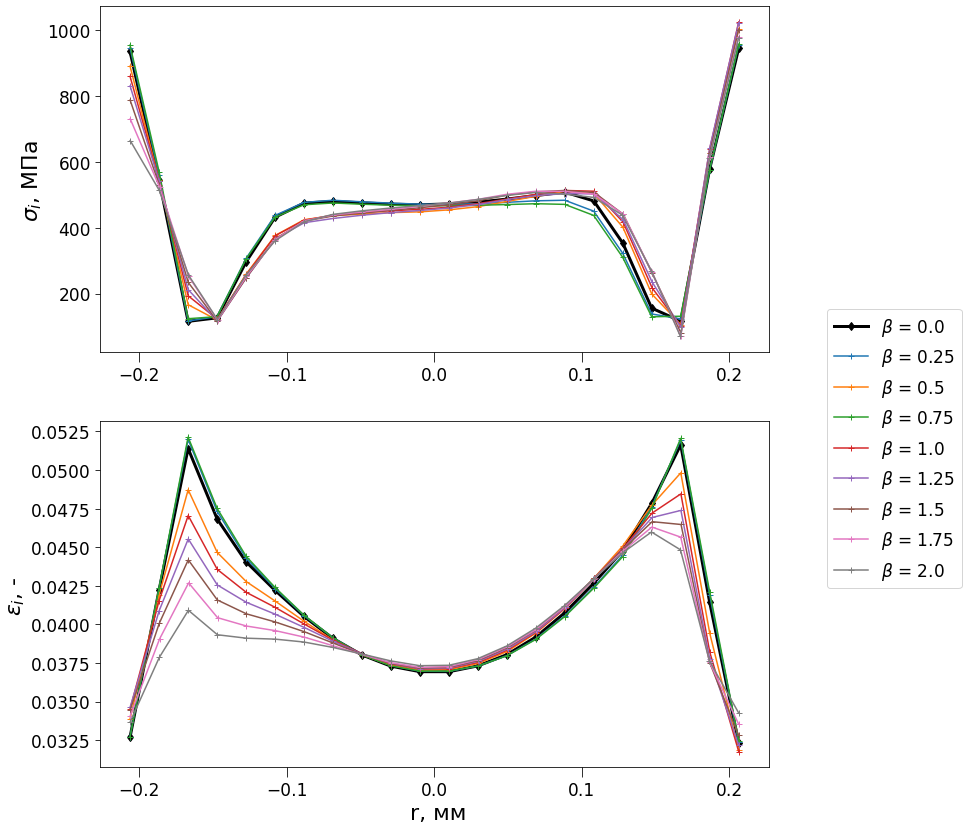

Wall time: 1min 39s


In [25]:
%%time
res,name = data_for_res_plot_angle_a(path,'03',4)
plot_res(res,name)

<timed exec>:13: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

<timed exec>:24: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

<timed exec>:13: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passin

<Figure size 2160x1008 with 0 Axes>

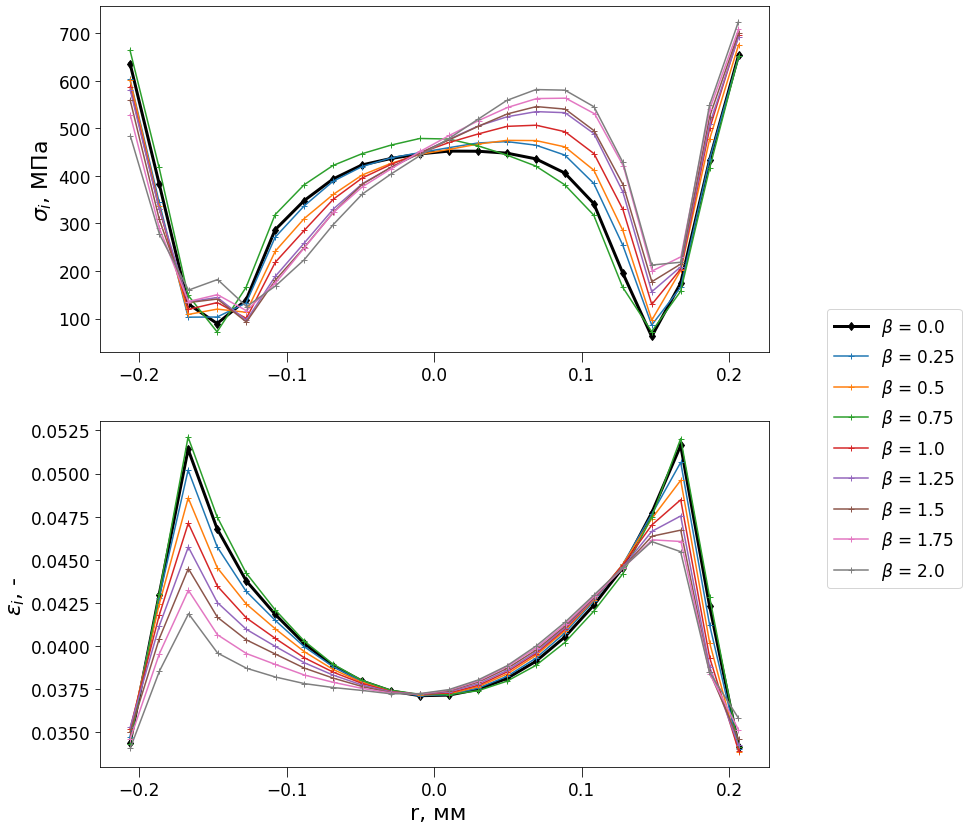

Wall time: 1min 17s


In [26]:
%%time
res,name = data_for_res_plot_angle_a(path,'05',4)
plot_res(res,name)

<timed exec>:13: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

<timed exec>:24: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

<timed exec>:13: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passin

<Figure size 2160x1008 with 0 Axes>

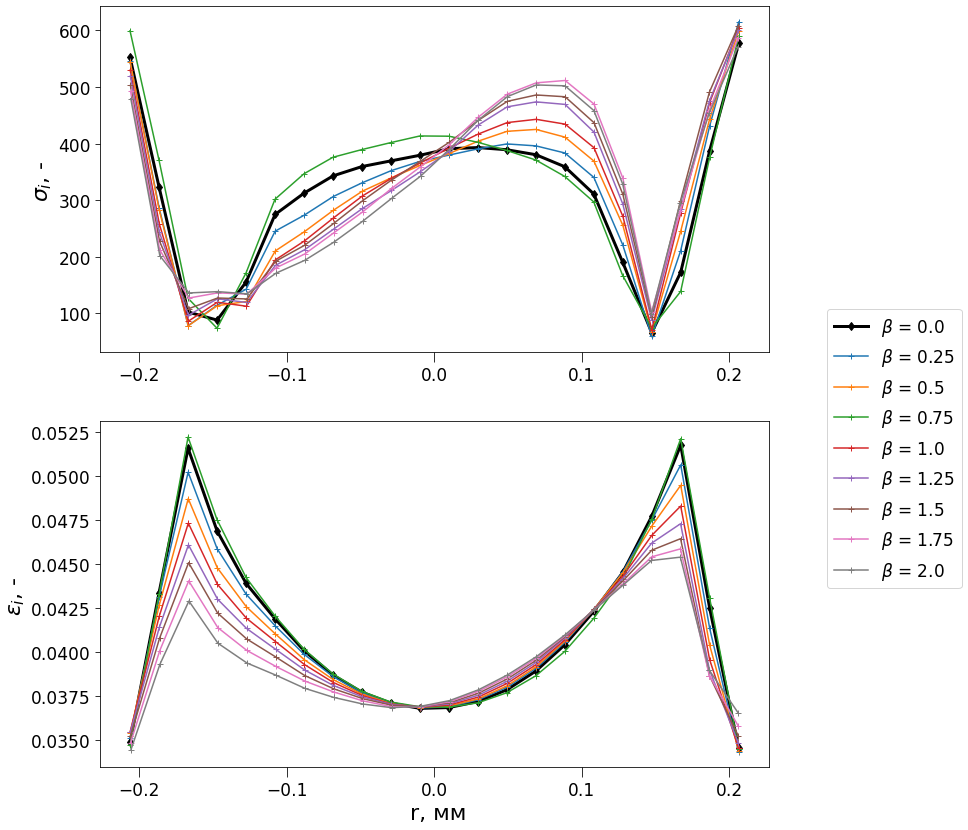

Wall time: 47.4 s


In [38]:
%%time
res,name = data_for_res_plot_angle_a(path,'07',4)
plot_res(res,name)

<timed exec>:13: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

<timed exec>:24: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

<timed exec>:13: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passin

<Figure size 2160x1008 with 0 Axes>

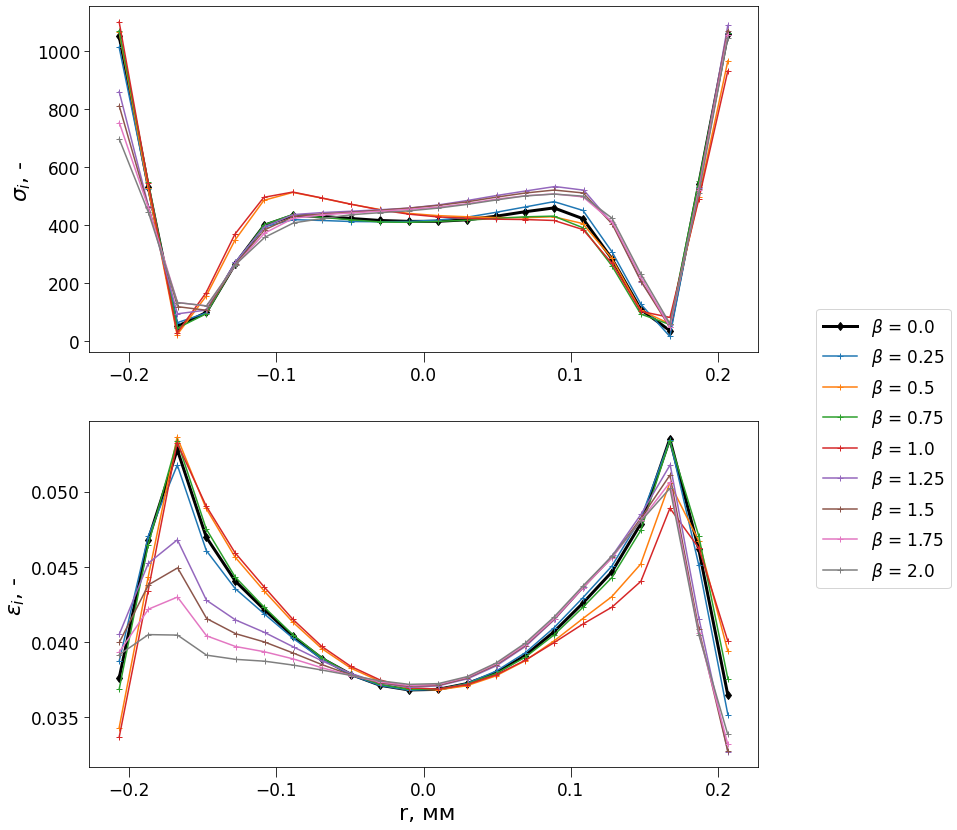

Wall time: 53.5 s


In [39]:
%%time
res,name = data_for_res_plot_angle_a(path,'03',5)
plot_res(res,name)

<timed exec>:13: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

<timed exec>:24: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

<timed exec>:13: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passin

<Figure size 2160x1008 with 0 Axes>

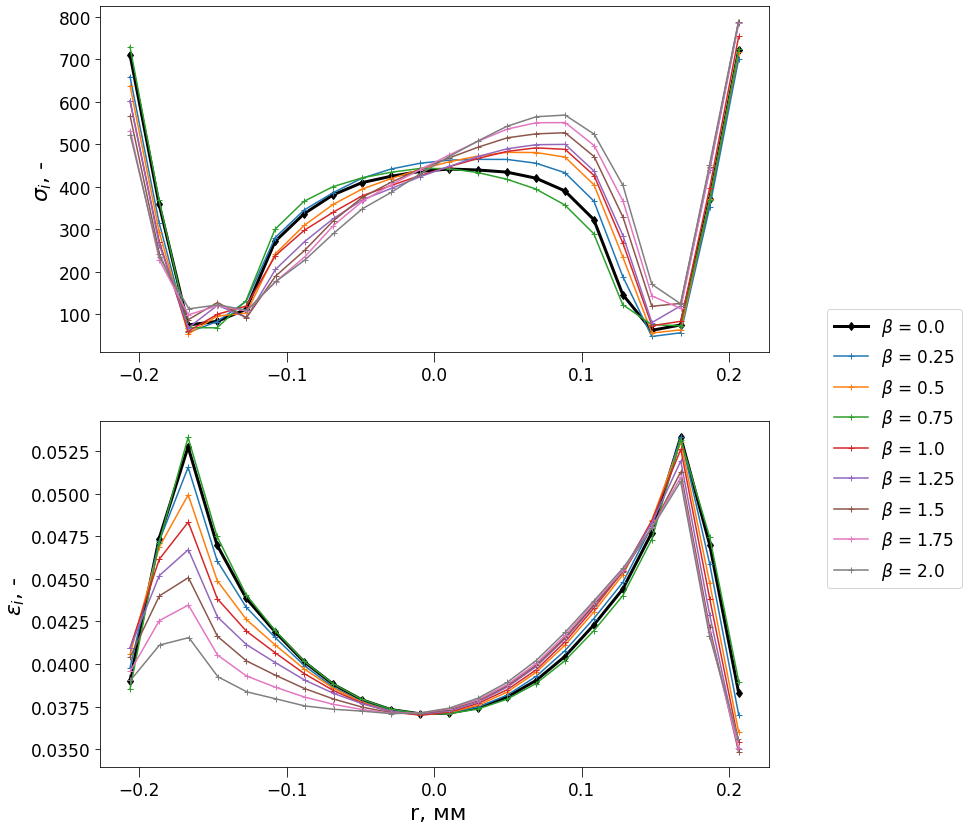

Wall time: 54 s


In [40]:
%%time
res,name = data_for_res_plot_angle_a(path,'05',5)
plot_res(res,name)

<timed exec>:13: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

<timed exec>:24: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

<timed exec>:13: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passin

<Figure size 2160x1008 with 0 Axes>

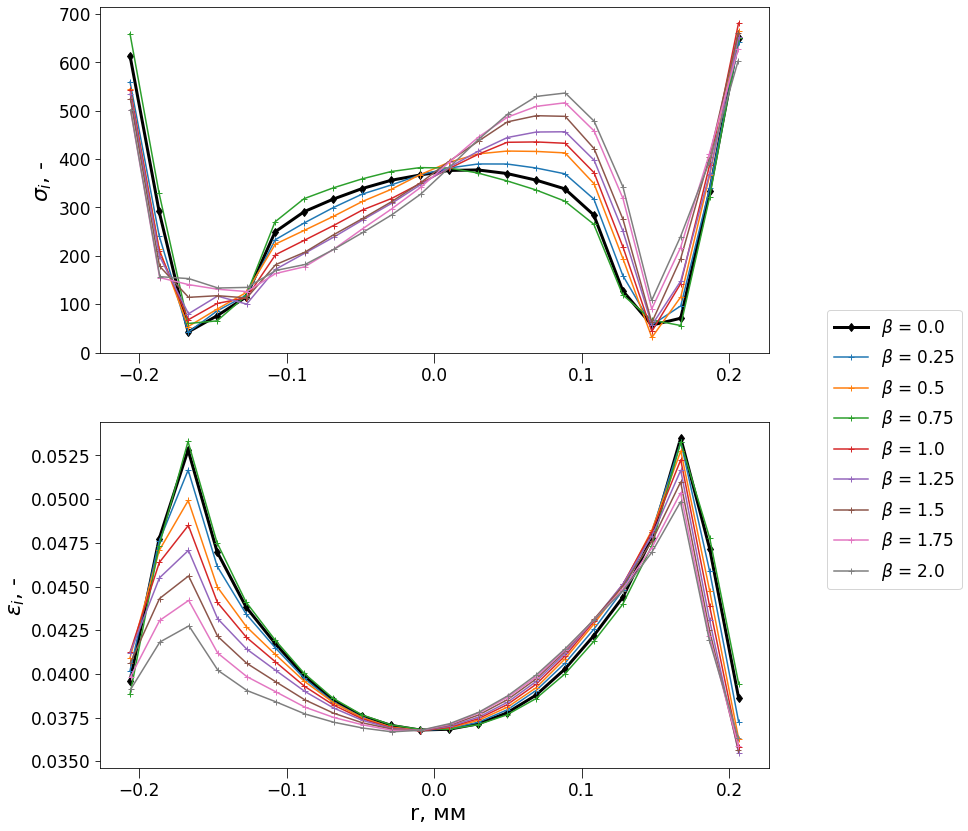

Wall time: 50.5 s


In [41]:
%%time
res,name = data_for_res_plot_angle_a(path,'07',5)
plot_res(res,name)

<timed exec>:13: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

<timed exec>:24: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

<timed exec>:13: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passin

<Figure size 2160x1008 with 0 Axes>

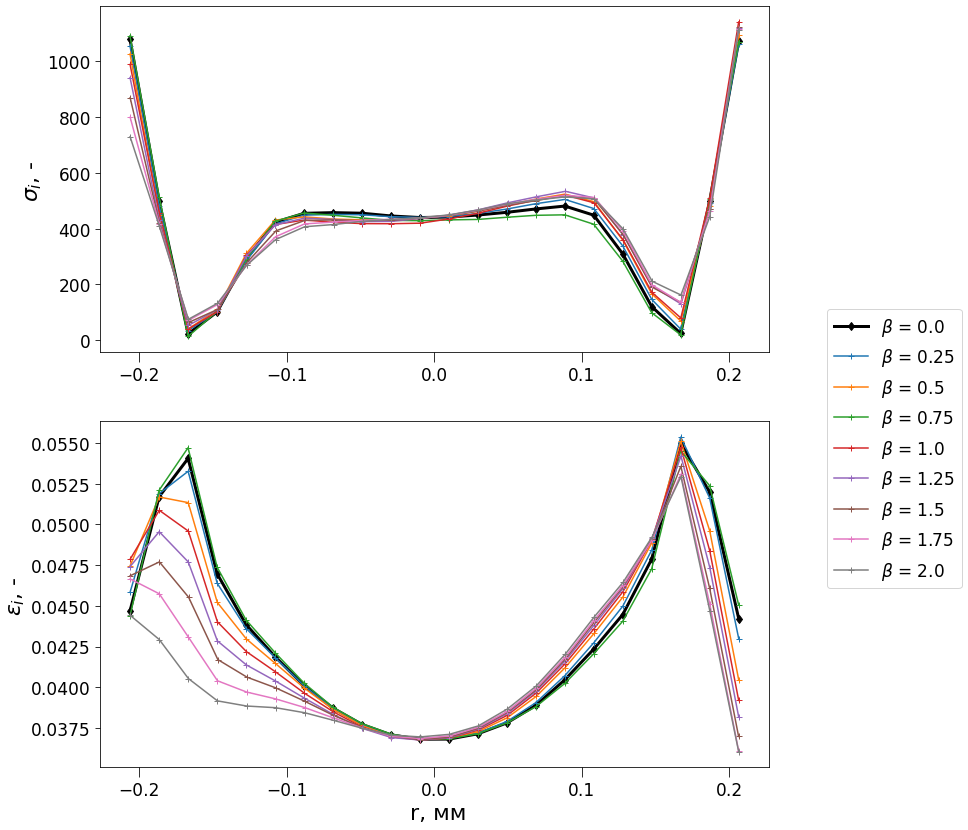

Wall time: 48 s


In [42]:
%%time
res,name = data_for_res_plot_angle_a(path,'03',6)
plot_res(res,name)

<timed exec>:13: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

<timed exec>:24: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

<timed exec>:13: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passin

<Figure size 2160x1008 with 0 Axes>

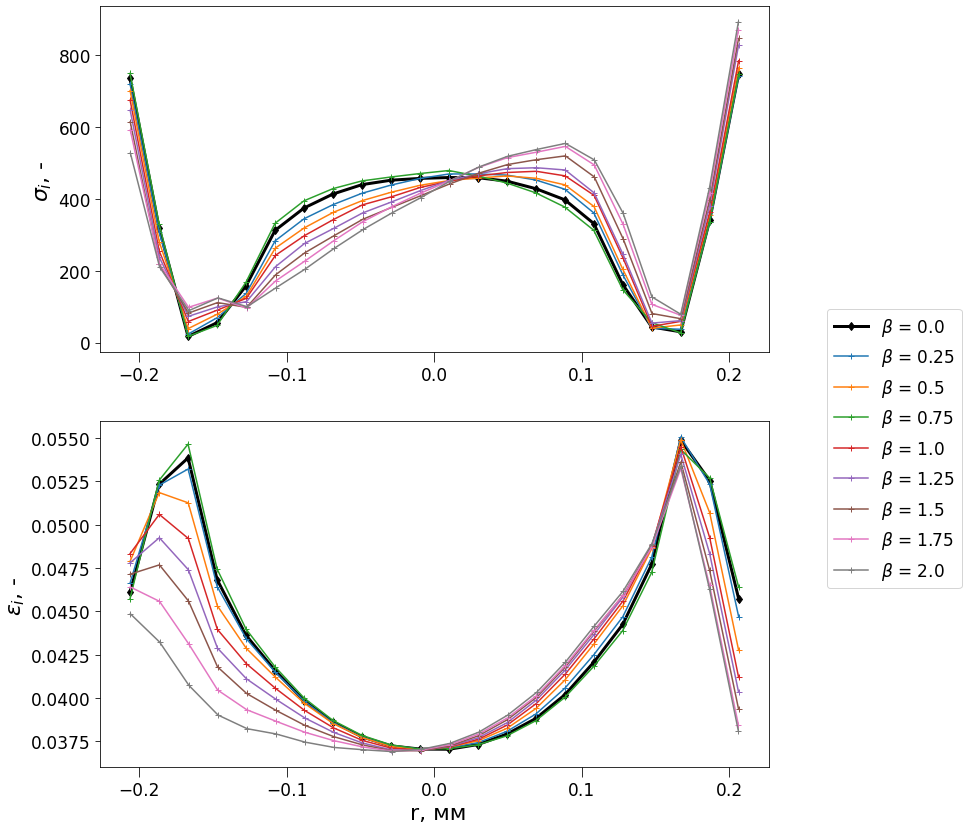

Wall time: 46.4 s


In [43]:
%%time
res,name = data_for_res_plot_angle_a(path,'05',6)
plot_res(res,name)

<timed exec>:13: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

<timed exec>:24: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

<timed exec>:13: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passin

<Figure size 2160x1008 with 0 Axes>

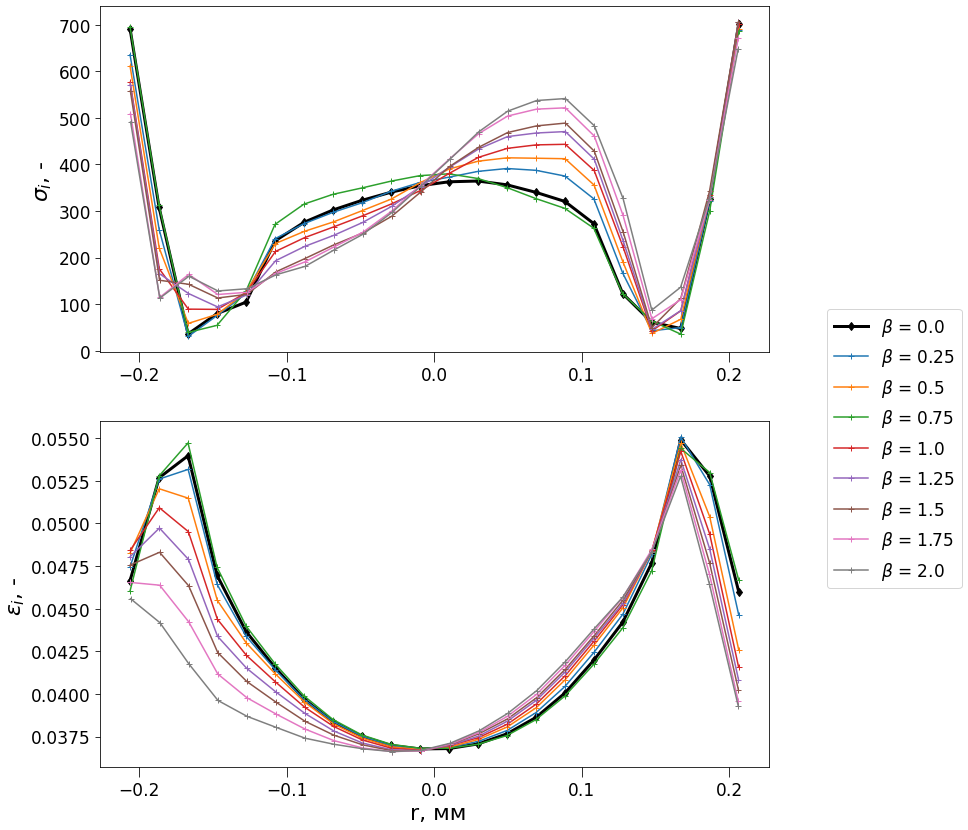

Wall time: 1min


In [44]:
%%time
res,name = data_for_res_plot_angle_a(path,'07',6)
plot_res(res,name)

<timed exec>:13: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

<timed exec>:24: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

<timed exec>:13: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passin

<Figure size 2160x1008 with 0 Axes>

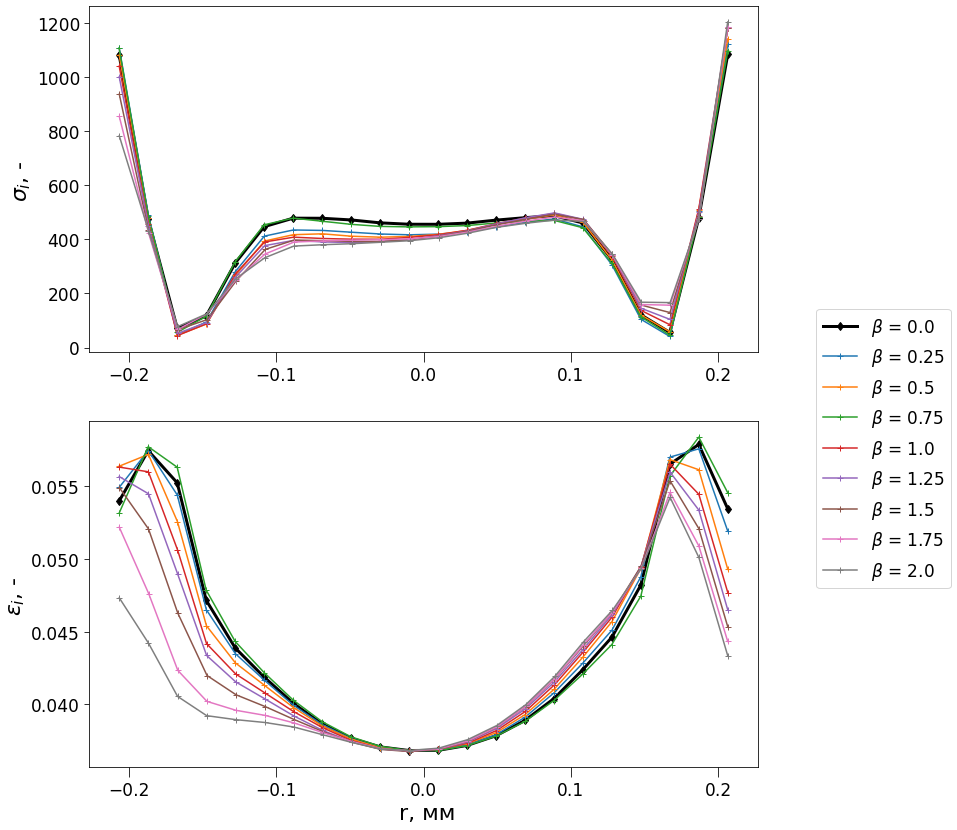

Wall time: 47.3 s


In [45]:
%%time
res,name = data_for_res_plot_angle_a(path,'03',7)
plot_res(res,name)

<timed exec>:13: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

<timed exec>:24: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

<timed exec>:13: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passin

<Figure size 2160x1008 with 0 Axes>

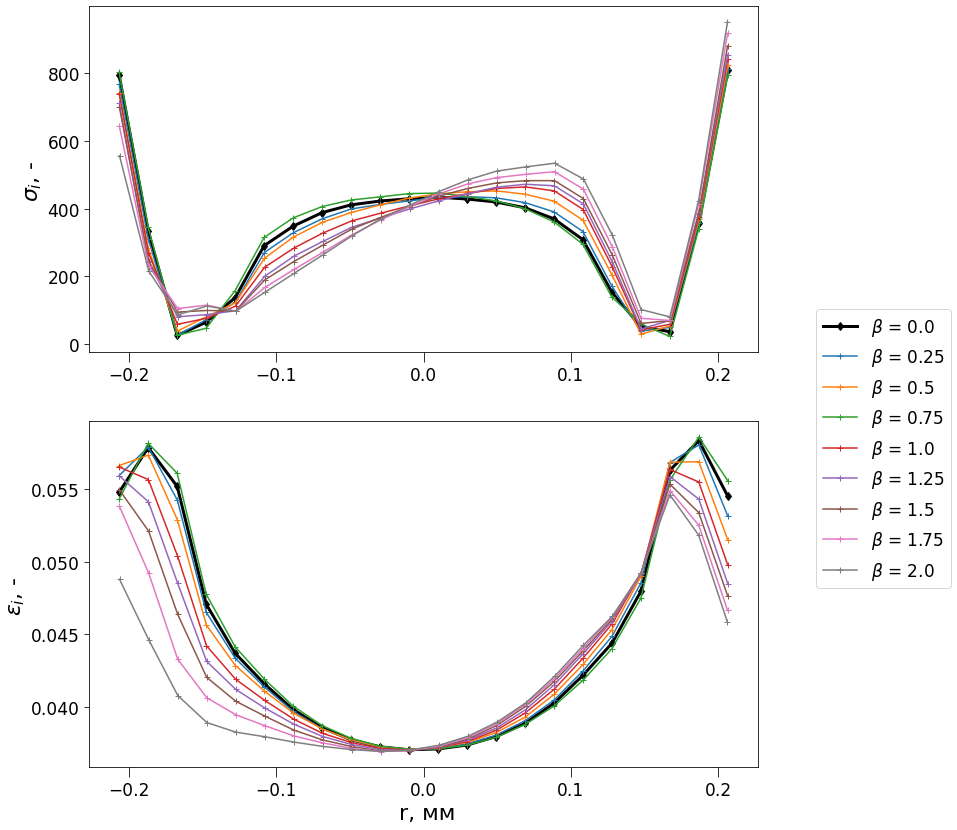

Wall time: 1min 11s


In [46]:
%%time
res,name = data_for_res_plot_angle_a(path,'05',7)
plot_res(res,name)

<timed exec>:13: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

<timed exec>:24: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

<timed exec>:13: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passin

<Figure size 2160x1008 with 0 Axes>

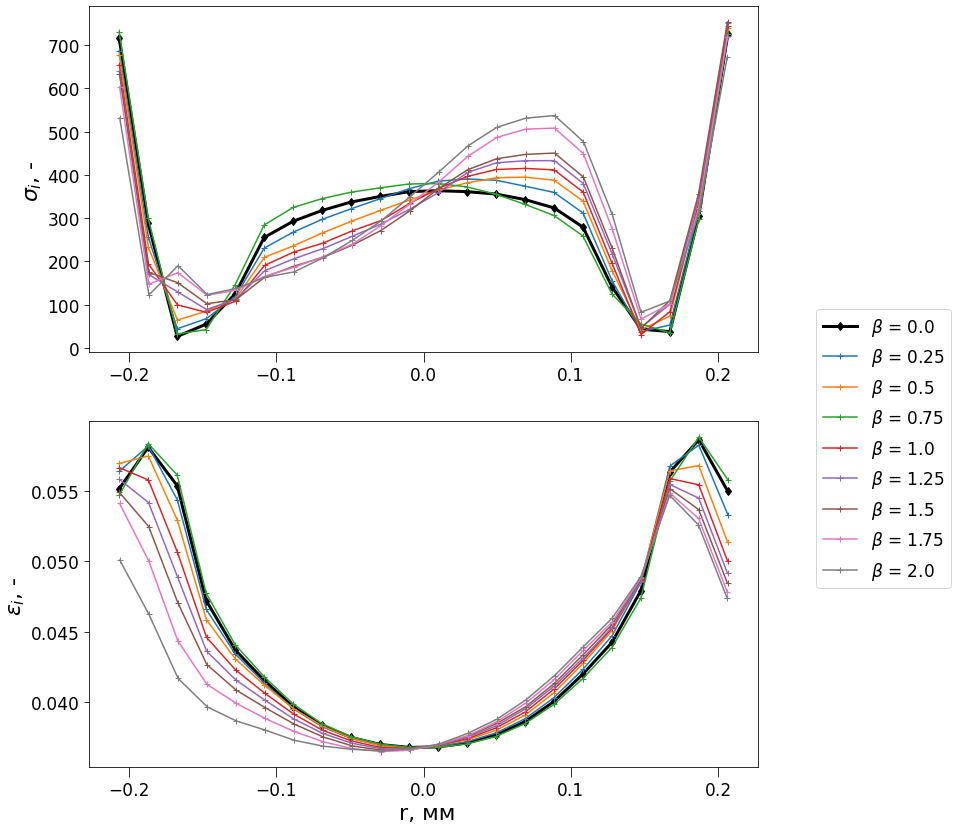

Wall time: 1min 15s


In [47]:
%%time
res,name = data_for_res_plot_angle_a(path,'07',7)
plot_res(res,name)

<timed exec>:13: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

<timed exec>:24: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

<timed exec>:13: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passin

<Figure size 2160x1008 with 0 Axes>

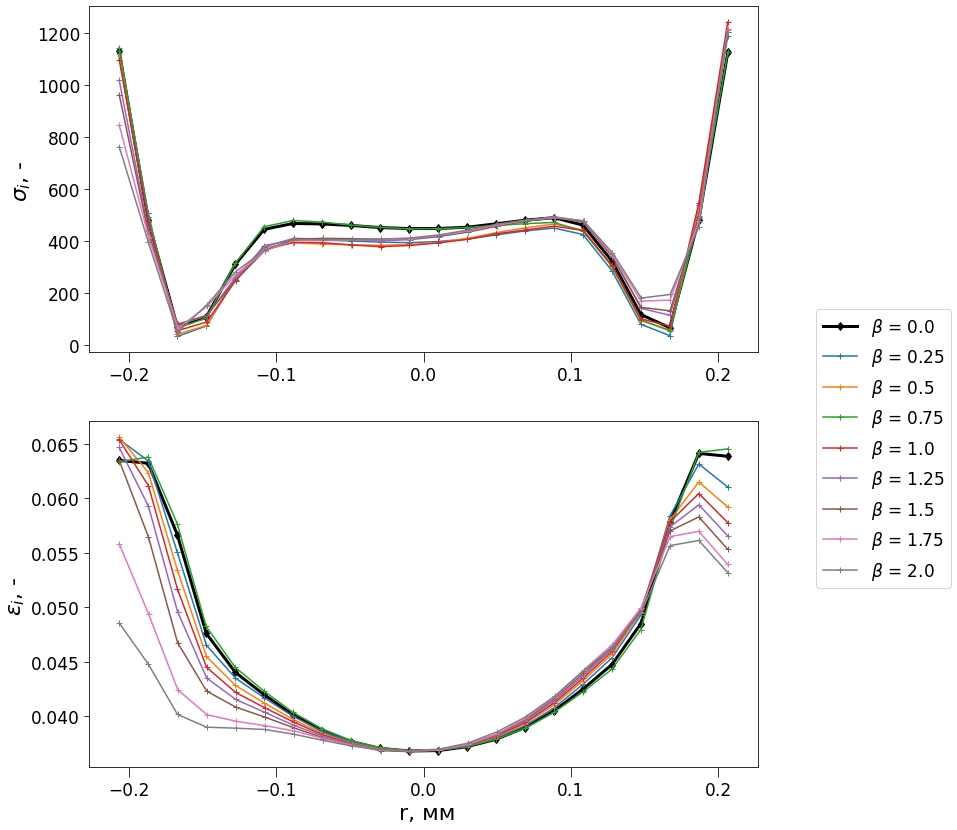

Wall time: 55.1 s


In [48]:
%%time
res,name = data_for_res_plot_angle_a(path,'03',8)
plot_res(res,name)

<timed exec>:13: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

<timed exec>:24: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

<timed exec>:13: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passin

<Figure size 2160x1008 with 0 Axes>

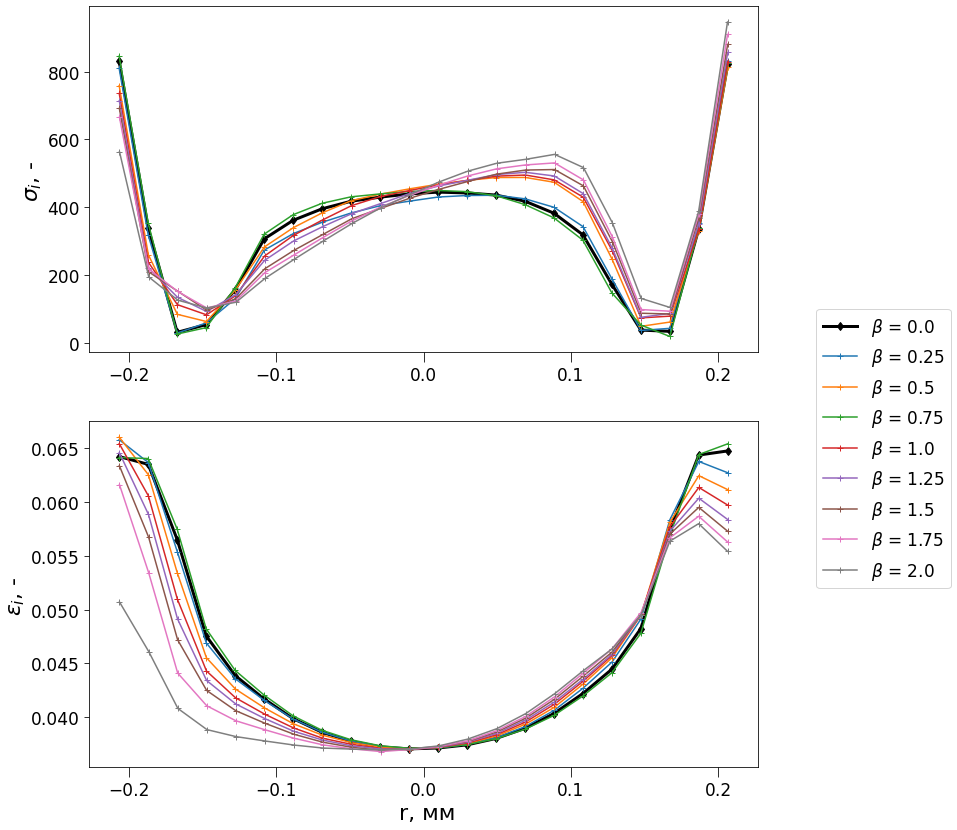

Wall time: 52.3 s


In [49]:
%%time
res,name = data_for_res_plot_angle_a(path,'05',8)
plot_res(res,name)

<timed exec>:13: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

<timed exec>:24: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

<timed exec>:13: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passin

<Figure size 2160x1008 with 0 Axes>

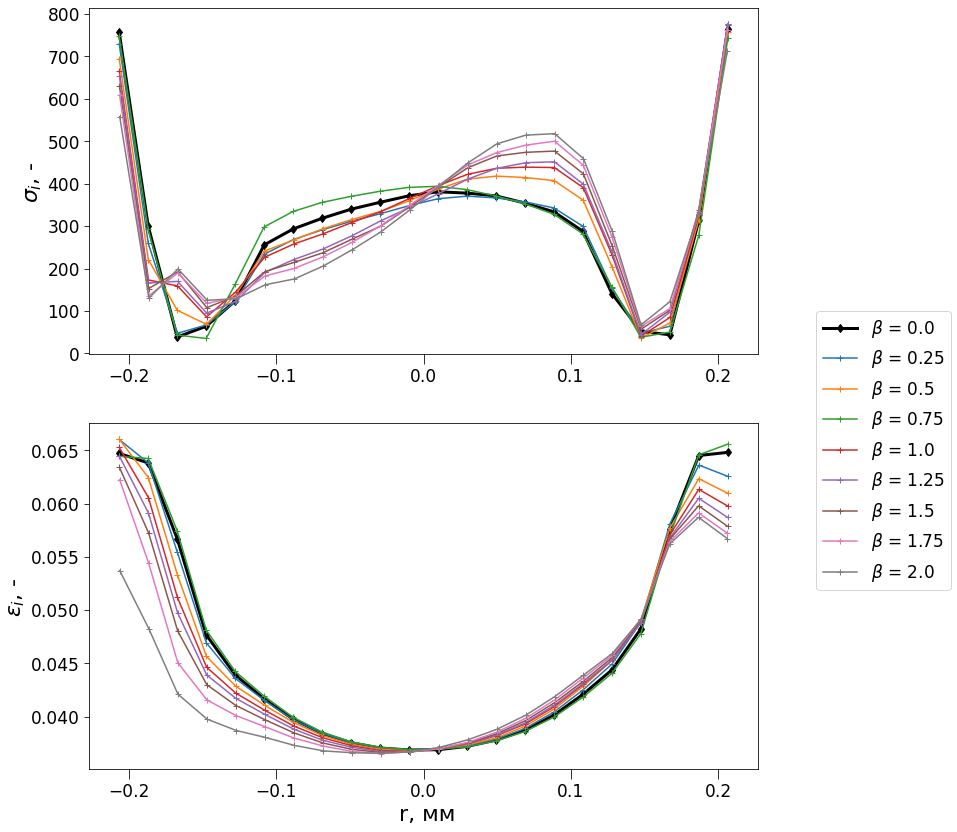

Wall time: 48.6 s


In [50]:
%%time
res,name = data_for_res_plot_angle_a(path,'07',8)
plot_res(res,name)